<a href="https://colab.research.google.com/github/WenquanZou/machine_learning_for_imaging/blob/master/01_Intro_ML_for_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Introduction to Machine Learning for Imaging

## Running on Colab

In [1]:
! wget https://www.doc.ic.ac.uk/~bglocker/teaching/notebooks/supervised-data.zip
! unzip supervised-data.zip

# data directory
data_dir = 'data/mnist/'

--2020-01-24 11:41:10--  https://www.doc.ic.ac.uk/~bglocker/teaching/notebooks/supervised-data.zip
Resolving www.doc.ic.ac.uk (www.doc.ic.ac.uk)... 146.169.13.6
Connecting to www.doc.ic.ac.uk (www.doc.ic.ac.uk)|146.169.13.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3167357 (3.0M) [application/zip]
Saving to: ‘supervised-data.zip’

supervised-data.zip 100%[===================>]   3.02M  --.-KB/s    in 0.09s   

2020-01-24 11:41:10 (32.2 MB/s) - ‘supervised-data.zip’ saved [3167357/3167357]

Archive:  supervised-data.zip
   creating: data/
   creating: data/mnist/
  inflating: data/mnist/README-original.txt  
  inflating: data/mnist/t10k-morpho.csv  
  inflating: data/mnist/train-morpho.csv  


## Running on DoC lab machines

In [0]:
# data directory
data_dir = '/vol/lab/course/416/data/mnist/'

## Image classification with Python

In this tutorial, we will learn basics of image IO and simple processing, and visualisation in Python. 
If you want to refresh your python basics, please check this [tutorial](http://cs231n.github.io/python-numpy-tutorial/) from the computer vision course at Stanford.

By the end of the tutorial, you should be able to:
1. Use python, numpy, and run jupyter notebook
2. Build a simple binary classifier 
3. Implement a logistic regression classifier using numpy

---
### Import stuff and set up some helper functions

In [0]:
# import common libraries
import numpy as np

# adjust settings to plot nice figures inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#########################################################
# functions to plot digits
#########################################################

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.gray,
               interpolation="nearest")
    plt.colorbar()
    # plt.axis("off")


def plot_digits(data, n_samples_row=10):
    images = [image.reshape(28,28) for image in data]
    n_rows = (len(images) - 1) // n_samples_row + 1
    # append empty images if the last row is not complete
    empty_images = n_rows * n_samples_row - len(data)
    images.append(np.zeros((28, 28 * empty_images)))
    # draw row by row
    images_row = []
    for current_row in range(n_rows):
        tmp_row_images = images[current_row * n_samples_row : (current_row + 1) * n_samples_row]
        images_row.append(np.concatenate(tmp_row_images, axis=1))
    # draw all in one image
    image = np.concatenate(images_row, axis=0)
    plt.figure(figsize=(n_samples_row,n_rows))
    plt.imshow(image, cmap = matplotlib.cm.gray)
    plt.colorbar()
    # plt.axis("off")


---

## MNIST digit recognition

In a real ML task, data would be available in a database and organised in tables, documents or files. In this tutorial, we will be using the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), small images of digits handwritten by high school students and employees of the US Census Bureau. It consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image is size-normalized and centered in a fixed-size image 28x28 pixels, and labeled with the digit it represents. It is kind of the *hello world* of machine learning for imaging. You can find more benchmark datasets [here](https://pytorch.org/docs/stable/torchvision/datasets.html)


0it [00:00, ?it/s]

9920512it [00:01, 8156610.45it/s]                            


Extracting data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to data/mnist/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 129962.84it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to data/mnist/MNIST/raw


1654784it [00:00, 2117019.40it/s]                            
0it [00:00, ?it/s]

Extracting data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to data/mnist/MNIST/raw


8192it [00:00, 49719.98it/s]            
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Extracting data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/mnist/MNIST/raw
Processing...
Done!
Train data:
shape (images, x,y) = (60000, 28, 28)
labels = [0 1 2 3 4 5 6 7 8 9]
Test data:
shape (images, x,y) = (10000, 28, 28)
labels = [0 1 2 3 4 5 6 7 8 9]


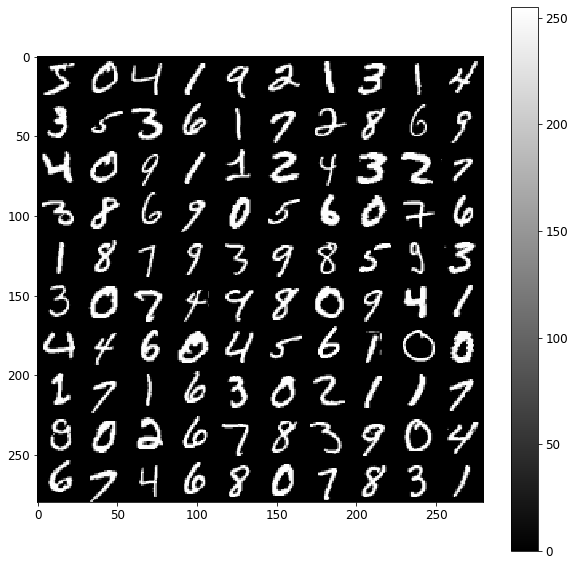

In [4]:
import torchvision.datasets as dset

# train data
train_set = dset.MNIST(root=data_dir, train=True, download=True)
train_data = np.array(train_set.train_data)
train_labels = np.array(train_set.train_labels)

# test data
test_set = dset.MNIST(root=data_dir, train=False, download=True)
test_data = np.array(test_set.test_data)
test_labels = np.array(test_set.test_labels)\

# print train and test data details
print('Train data:')
print('shape (images, x,y) = {}'.format(train_data.shape))
print('labels = {}'.format(np.unique(train_labels)))

print('Test data:')
print('shape (images, x,y) = {}'.format(test_data.shape))
print('labels = {}'.format(np.unique(test_labels)))


# plot sample digits
plot_digits(train_set.train_data[:100])
plt.show()

---
Here, we will sort our data and fix the random seed to ensure geting same results everytime you run the experiments. Then plot some sampled digits after sorting the data.

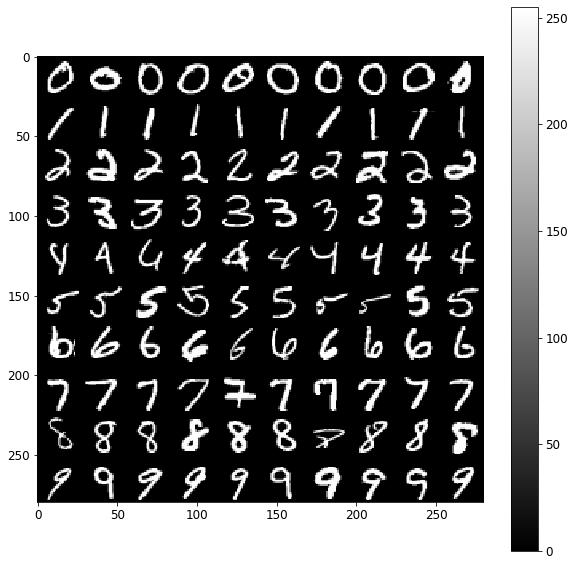

In [8]:
# we will sort our data and fix the random generator seed to get similar results from different runs
np.random.seed(42)

# sort dataset
def sort_data(data, labels):
        sorted_idxs = np.array(sorted([(target, i) for i, target in enumerate(labels)]))[:, 1]
        return data[sorted_idxs], labels[sorted_idxs]

############################################################################
# Q: use the previous function to sort both training and testing data
############################################################################

sorted_train_data, sorted_train_label = sort_data(train_data, train_labels)
sorted_test_data, sorted_test_label = sort_data(test_data, test_labels)

############################################################################

# plot sampled images from sorted data
# here it samples 20 samples of [0,1], 30 samples of [2,3,4], and 50 samples of [5,6,7,8,9] - 10 samples for each digit
example_images = np.r_[sorted_train_data[:12000:600], sorted_train_data[13000:30600:600], sorted_train_data[30600:60000:590]]
plot_digits(example_images)
plt.show()

---
### Simple Binary Classifier

Now our data are cleaned and sorted, we will train a simple binary classifier to distinguish between two selected digits. 

Data usually is divided into three sets for training, validation, and testing. The training data is used to train the model's parameters, while the validation set is used to adjust the model's hyperparameters. Finally, the performance of the trained model is evaluated on the testing data. For this tutorial we will split the data into train and test for simplification. 

**Task**

1. Extract ones and eights from both training and testing data
2. Shuffle training data
3. Plot number of images versus number of 'white' pixels per image
4. Can you predict the label based only on the number of 'white' pixels? What's the training and testing error for such an approach?

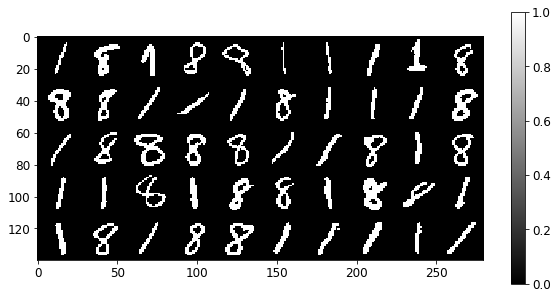

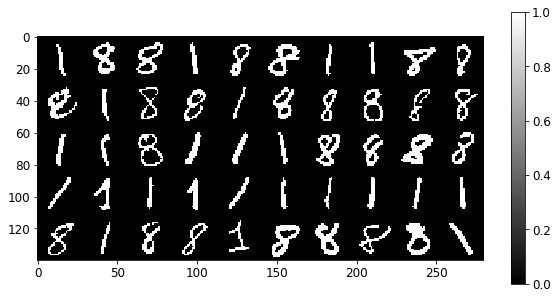

In [65]:
############################################################################
# Extract sample digits of ones and eights
############################################################################

def sample_data_digits(data, labels, labels_to_select):
    # convert input 3d arrays to 2d arrays
    nsamples, nx, ny = data.shape
    data_vec = np.reshape(data,(nsamples,nx*ny))
   
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data_vec[selected_indexes]
    selected_labels = labels[selected_indexes]
    
    # Convert images from gray to binary by thresholding intensity values
    selected_data = 1.0 * (selected_data >= 128)

    # convert labels to binary: digit_0=False, digit_1=True
    selected_labels = selected_labels==labels_to_select[1]
    
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]

    return selected_data, selected_labels


############################################################################
# Q: extract ones and eights digits from both training and testing data 
############################################################################

selected_train_data, selected_train_label = sample_data_digits(sorted_train_data, sorted_train_label, [1, 8])

selected_test_data, selected_test_label = sample_data_digits(sorted_test_data, sorted_test_label, [1, 8])

############################################################################

# plot sampled digits
plot_digits(selected_train_data[0:50])
plt.show()
plot_digits(selected_train_data[8000:8050])
plt.show()

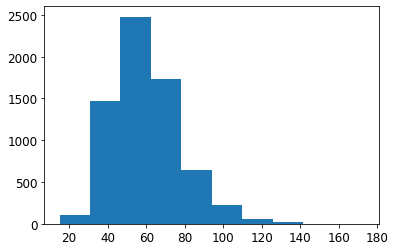

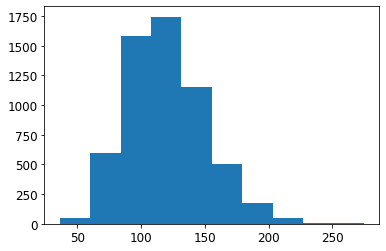

In [66]:
############################################################################
# Q:plot number of images versus number of 'white' foreground pixels 
# for both 1s and 8s classes.
############################################################################

frequency_ones = [np.count_nonzero(selected_train_data[i]) for i, target in enumerate(selected_train_label) if target == 0]
frequency_eights = [np.count_nonzero(selected_train_data[i]) for i, target in enumerate(selected_train_label) if target == 1]
plt.hist(frequency_ones)
plt.show()
plt.hist(frequency_eights)
plt.show()

In [0]:
############################################################################
# Q: select threshold value to sperate between the two classes
############################################################################

threshold = 80

In [0]:
############################################################################
# Q: classify digits using a threshold 
############################################################################

classified_train = [np.count_nonzero(data_point) > threshold for data_point in selected_train_data]

classified_test = [np.count_nonzero(data_point) > threshold for data_point in selected_test_data]

In [73]:
############################################################################
# Q: calculate both training and testing accuracy
# You should get accuracies around 89-90%
############################################################################
sum_correct = 0
for i in range(len(classified_train)):
  if (classified_train[i] == selected_train_label[i]):
    sum_correct = sum_correct + 1 
train_acc = sum_correct / len(classified_train) * 100
print('Train accuracy = {:.2f}%'.format(train_acc))

sum_correct = 0
for i in range(len(classified_test)):
  
  if (classified_test[i] == selected_test_label[i]):
    sum_correct = sum_correct + 1
test_acc = sum_correct / len(classified_test) * 100
print('Test accuracy = {:.2f}%'.format(test_acc))

Train accuracy = 89.30%
Test accuracy = 90.00%


---
**Task**

Repeat the previous examples to classify digits 0s and 8s instead of 1s and 8s. Will the threshold binary classifier differentiate between the two categories based on number of 'white' pixels?

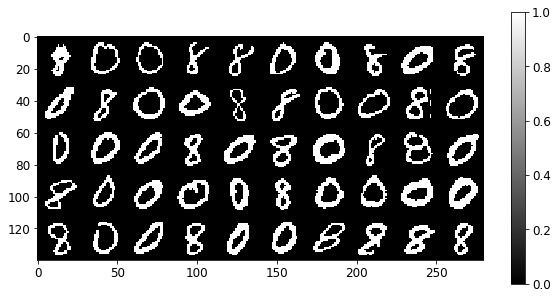

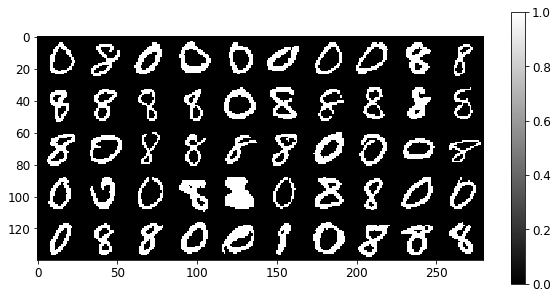

In [74]:
############################################################################
# Q: extract zeros and eights digits from both training and testing data
############################################################################

selected_train_data, selected_train_label = sample_data_digits(sorted_train_data, sorted_train_label, [0, 8])

selected_test_data, selected_test_label = sample_data_digits(sorted_test_data, sorted_test_label, [0, 8])

############################################################
# Q: plot number of images versus number of pixels
############################################################

# plot sampled digits
plot_digits(selected_train_data[0:50])
plt.show()
plot_digits(selected_train_data[8000:8050])
plt.show()

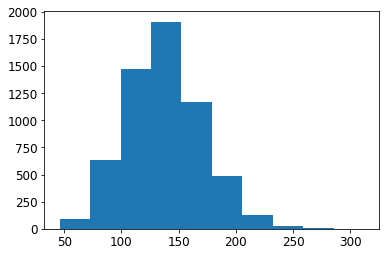

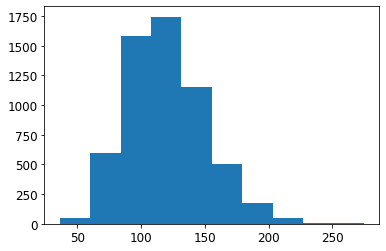

In [82]:
############################################################################
# Q: select threshold value to sperate between the two classes
############################################################################

frequency_ones = [np.count_nonzero(selected_train_data[i]) for i, target in enumerate(selected_train_label) if target == 0]
frequency_eights = [np.count_nonzero(selected_train_data[i]) for i, target in enumerate(selected_train_label) if target == 1]
plt.hist(frequency_ones)
plt.show()
plt.hist(frequency_eights)
plt.show()
threshold = 100
############################################################################
# Q: classify digits using a threshold 
############################################################################

classified_train = [np.count_nonzero(data_point) > threshold for data_point in selected_train_data]

classified_test = [np.count_nonzero(data_point) > threshold for data_point in selected_test_data]

#INSERT CODE HERE

In [83]:
sum_correct = 0
for i in range(len(classified_train)):
  if (classified_train[i] == selected_train_label[i]):
    sum_correct = sum_correct + 1 
train_acc = sum_correct / len(classified_train) * 100
print('Train accuracy = {:.2f}%'.format(train_acc))

sum_correct = 0
for i in range(len(classified_test)):
  
  if (classified_test[i] == selected_test_label[i]):
    sum_correct = sum_correct + 1
test_acc = sum_correct / len(classified_test) * 100
print('Test accuracy = {:.2f}%'.format(test_acc))

Train accuracy = 41.90%
Test accuracy = 43.65%


---
## Logistic Regression using Numpy

In the previous example, we used a simple threshold to classify each image of a digit using one feature (number of 'white' pixels).

Here, we will use a logistic regression model for the same task but using raw pixel information as input features. The logistic regression function is defined as: $h_{\Theta}(\mathbf{x}) =  \frac{1}{1 + \exp(- \Theta^{\top} \mathbf{x})}$.

It's useful to group all training samples into one big matrix $\mathbf{X}$ of size *(number_samples x number_features)*, and their labels into one vector $\mathbf{y}$ as in the code below.

Training our model is a loop that includes three main steps
1. Evaluate the cost function $J(\Theta)$
2. Compute partial derivatives
3. Update the model paramteters

---

**Task**

1. Complete the logistic regression class below 
2. Train a logistic regression model on the data from the previous example
3. Compute train and test accuracies, and compare with the previous results
4. Plot the trained parameters and comment on the figure

In [0]:
class LogisticRegression:
    def __init__(self, lr=0.05, num_iter=1000, add_bias=True, verbose=True):
        self.lr = lr
        self.verbose = verbose
        self.num_iter = num_iter
        self.add_bias = add_bias
    
    def __add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        return np.concatenate((bias, X), axis=1)
    


    def __loss(self, h, y):
        ''' computes loss values '''
        y = np.array(y,dtype=float)        
        ############################################################################
        # Q: compute the loss 
        ############################################################################
        return #INSERT CODE HERE

    
    def fit(self, X, y):
        ''' 
        Optimise our model using gradient descent
        Arguments:
            X input features
            y labels from training data
            
        '''
        if self.add_bias:
            X = self.__add_bias(X)
        
        ############################################################################
        # Q: initialise weights randomly with normal distribution N(0,0.01)
        ############################################################################
        self.theta = #INSERT CODE HERE
        
        for i in range(self.num_iter):
            ############################################################################
            # Q: forward propagation
            ############################################################################
            z = #INSERT CODE HERE
            h = #INSERT CODE HERE
            ############################################################################
            # Q: backward propagation
            ############################################################################
            gradient = #INSERT CODE HERE
            # update parameters
            self.theta -= #INSERT CODE HERE
            ############################################################################
            # Q: print loss
            ############################################################################
            if(self.verbose == True and i % 50 == 0):
                h = #INSERT CODE HERE
                print('loss: {} \t'.format(self.__loss(h, y)))
    
    def predict_probs(self,X):
        ''' returns output probabilities
        '''
        ############################################################################
        # Q: forward propagation
        ############################################################################
        if self.add_bias:
            X = self.__add_bias(X)
        z = #INSERT CODE HERE
        return #INSERT CODE HERE

    def predict(self, X, threshold=0.5):
        ''' returns output classes
        '''
        return self.predict_probs(X) >= threshold


In [0]:
#########################################################################
# Q: train our model
#########################################################################

#INSERT CODE HERE

In [0]:
#########################################################################
# Q: Evaluate the trained model - compute train and test accuracies
# You should get accuracies around 98-99%
#########################################################################
train_preds = #INSERT CODE HERE
logistic_train_acc = #INSERT CODE HERE
print('Train accuracy = {:.2f}%'.format(logistic_train_acc))

test_preds = #INSERT CODE HERE
logistic_test_acc = #INSERT CODE HERE
print('Test accuracy = {:.2f}%'.format(logistic_test_acc))

In [0]:
#########################################################################
# Plot trained model params (weights) as an image of size (28x28)
#########################################################################
plt.imshow(model.theta[:-1].reshape(28,28))
plt.colorbar()
plt.show()

---
## Using explicit features for classification

We have now seen how we can build a digit classifier using the raw pixel information as features. In some ML applications, it is possible (or even desired) to hand engineer the feature extraction stage. Here, we are exploring how far we can get with morphometric features extracted for MNIST digits, namely the area, length, thickness, slant, width, height.

In [0]:
import os
import pandas as pd

# Reload MNIST
train_data = np.array(train_set.train_data)
train_labels = np.array(train_set.train_labels)

# test data
test_data = np.array(test_set.test_data)
test_labels = np.array(test_set.test_labels)

# Read the meta data using pandas
train_features = pd.read_csv(data_dir + 'train-morpho.csv')
test_features = pd.read_csv(data_dir + 't10k-morpho.csv')
train_features.head() # show the first five data entries of the training set

In [0]:
plt.scatter(test_features['area'],test_features['length'], marker='.', c=test_labels)
plt.grid()
plt.xlabel('feature i')
plt.ylabel('feature j')
plt.show()

In [0]:
# Reformat the data
X_train = np.transpose(np.array([train_features['area'].values,train_features['length'].values,train_features['thickness'].values,train_features['slant'].values,train_features['width'].values,train_features['height'].values]))
X_test = np.transpose(np.array([test_features['area'].values,test_features['length'].values,test_features['thickness'].values,test_features['slant'].values,test_features['width'].values,test_features['height'].values]))

In [0]:
def sample_data(data, labels, labels_to_select):
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data[selected_indexes]
    selected_labels = labels[selected_indexes]

    # convert labels to binary: digit_0=False, digit_1=True
    selected_labels = selected_labels==labels_to_select[1]
    
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]

    return selected_data, selected_labels

Similar to above, let's pick data for a simple binary classification between two digits. Let's start with 0s and 8s.

In [0]:
labels_to_select = [0,8]
selected_train_data, selected_train_labels = sample_data(X_train,train_labels,labels_to_select)
selected_test_data, selected_test_labels = sample_data(X_test,test_labels,labels_to_select)

---
**Task**

This time we use a logistic regression model from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Train the logistic regression on the data and calculate the classification accuracy for both training and testing.

In [0]:
from sklearn import linear_model

#########################################################################
# Q: Use scikit-learn's logistic regression model
#########################################################################

#INSERT CODE HERE

In [0]:
#########################################################################
train_preds = model.predict(selected_train_data)
logistic_train_acc = #INSERT CODE HERE
print('Train accuracy = {:.2f}%'.format(logistic_train_acc))

test_preds = model.predict(selected_test_data)
logistic_test_acc = #INSERT CODE HERE
print('Test accuracy = {:.2f}%'.format(logistic_test_acc))

---
***Bonus (optional)***

Extend all of the above to the full 10-class classification problem.
